Gabriel Gonçalves 93069

Daniel Okudaira Carapeto 93180

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT

theta = 0.7
m = 3  # Número de qubits de controle
pi = 3.14

O código começa importando as bibliotecas necessárias do Qiskit e definindo algumas variáveis. theta é um valor usado na Estimação de Fase, e m é o número de qubits de controle.

In [2]:
control_register = QuantumRegister(m, name="Control")
target_register = QuantumRegister(1, name="|ψ>")
output_register = ClassicalRegister(m, name="Result")

São criados três registradores quânticos: control_register com m qubits de controle, target_register com 1 qubit para preparar o vetor próprio, e output_register com m bits clássicos para armazenar os resultados da medição.

In [3]:
qc = QuantumCircuit(control_register, target_register, output_register)

Um circuito quântico qc é criado com os registradores definidos anteriormente.

In [4]:
qc.x(target_register)
qc.barrier()

O vetor próprio é preparado no estado |1> aplicando uma porta X (porta de negação) no qubit do registrador target_register. A barreira (barrier()) é usada para separar etapas do circuito para melhor visualização.

In [5]:
for index, qubit in enumerate(control_register):
    qc.h(qubit)
    for _ in range(2**index):
        qc.cp(2 * pi * theta, qubit, target_register)
qc.barrier()

O código executa a Estimação de Fase. Para cada qubit de controle no control_register, aplica-se uma porta Hadamard (h) e, em seguida, uma série de portas de controle de fase (cp) com ângulos determinados por theta. Isso é feito para cada qubit no control_register. A barreira é usada para separar essa etapa da próxima.

In [6]:
qc.compose(
    QFT(m, inverse=True),
    inplace=True
)

O código aplica a Transformada de Fourier Quântica (QFT) inversa ao circuito. A QFT é uma etapa importante na Estimação de Fase, e neste caso, é aplicada de forma inversa.

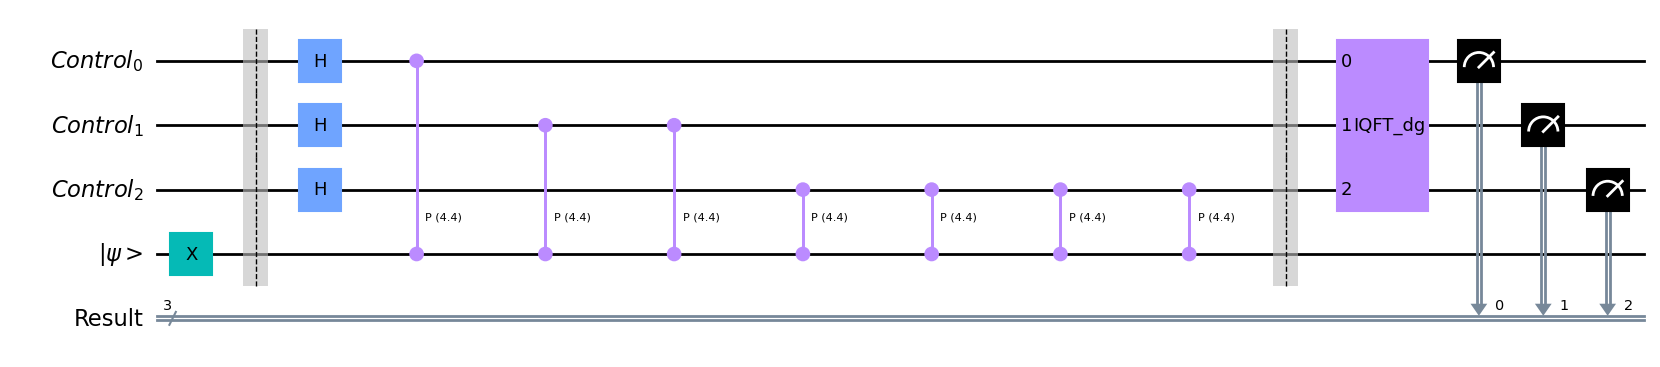

In [7]:
qc.measure(range(m), range(m))
display(qc.draw())

# Transformada Quântica de Fourier (QFT) em Computação Quântica

A Transformada Quântica de Fourier (QFT) é uma operação importante na computação quântica que desempenha um papel fundamental em vários algoritmos quânticos.

## Etapas da Transformada Quântica de Fourier

A QFT é uma transformada linear que age em um estado quântico, mapeando-o para seu espaço de momento angular. A transformada é frequentemente aplicada a qubits e tem as seguintes etapas:

### 1. Preparação do Estado

Suponha que temos um estado quântico de n qubits, representado como |x⟩, onde x é uma sequência binária. A primeira etapa é preparar esse estado.

### 2. Aplicação da QFT

A QFT é aplicada ao estado |x⟩ da seguinte maneira:

- Para cada qubit no estado |x⟩, aplicamos uma série de rotações controladas para criar uma superposição de estados.
- As rotações controladas são realizadas usando exponenciais complexas e fases que dependem do valor do qubit e de sua posição.
- A QFT gera uma superposição de todos os possíveis estados |y⟩, onde y é um número inteiro representado em notação binária.

### 3. Resultado

O resultado da aplicação da QFT é um novo estado quântico que representa uma superposição de todos os estados |y⟩. Essa superposição é característica da QFT e é usada em algoritmos quânticos para executar transformações importantes.

## Aplicações da QFT

A QFT é fundamental em muitos algoritmos quânticos, incluindo o algoritmo de Shor para a fatoração de números inteiros e o algoritmo de busca quântica de Grover. Ela desempenha um papel crucial na eficiência desses algoritmos, permitindo que operações matemáticas complexas sejam realizadas em superposições de estados quânticos.

## Conclusão

A Transformada Quântica de Fourier é uma operação fundamental na computação quântica que desempenha um papel essencial em vários algoritmos quânticos. Ela permite a manipulação eficiente de superposições de estados quânticos e é uma das ferramentas mais poderosas da computação quântica.

Espero que esta explicação tenha esclarecido o funcionamento da QFT, incluindo a parte matemática envolvida.


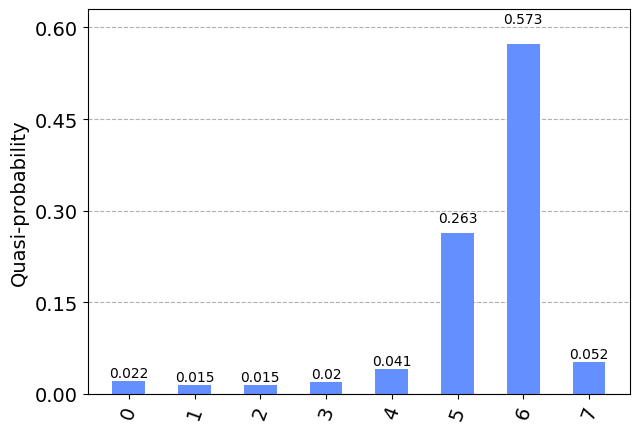

In [8]:
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

result = Sampler().run(qc).result()
display(plot_histogram(result.quasi_dists))